
**Análise Exploratória - Video Games**


Juliana Lilian Duque - 22/07/2021

In [3]:
#Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Video Game Sales Exploratory**

* Rank: Posição no ranking de vendas.
* Name: Nome do jogo.
* Platform: Plataforma (Console) em que o jogo foi liberado.
* Year: Ano de lançamento.
* Genre: Gênero do jogo.
* Publisher: Empresa que publicou o jogo.
* NA_Sales: Vendas na América do Norte (em milhões de dólares).
* EU_Sales: Vendas na Europa (em milhões de dólares).
* JP_Sales: Vendas no Japão (em milhões de dólares).
* Other_Sales: Vendas no restante do mundo (em milhões de dólares).
* Global_Sales: Total de vendas no mundo inteiro.






In [4]:
#Carregar arquivo
df = pd.read_csv('/content/sample_data/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [6]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [7]:
df.shape

(16598, 11)

In [8]:
#Verificar campos NA
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
#Dropar os NA´s do Publisher e Year
df = df.dropna(subset=['Publisher', 'Year'], axis=0)
df = df.reset_index(drop=True)
#df.isna().sum()

In [11]:
#Converter campo data para int
df['Year'] = df['Year'].astype(int)
df['Year'].dtype

dtype('int64')

In [129]:
# Verificar os Publishers
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [12]:
# Verificar os games da Nintendo
df_nintendo = df.loc[df['Publisher'] == 'Nintendo']
df_nintendo

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
15971,16272,Slide Adventure: Mag Kid,DS,2007,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16057,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16153,16459,Art Academy: Home Studio,WiiU,2015,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16170,16476,Captain Rainbow,Wii,2008,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [13]:
# Verificar os games do Mario na Nintendo
df_nintendo_mario  = df_nintendo[df_nintendo['Name'].str.contains('Mario')]
df_nintendo_mario

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
11,12,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
...,...,...,...,...,...,...,...,...,...,...,...
11910,12125,Mario Tennis,Wii,2010,Sports,Nintendo,0.00,0.06,0.00,0.01,0.07
12153,12375,Mario vs. Donkey Kong: Tipping Stars,3DS,2015,Puzzle,Nintendo,0.00,0.00,0.06,0.00,0.06
12543,12772,Dance Dance Revolution: Mario Mix (JP sales),GC,2005,Simulation,Nintendo,0.00,0.00,0.05,0.00,0.06
16057,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01


In [124]:
#Verificar a lista de jogos do Mario Bros
df_nintendo_mario['Name'].unique().tolist()
#c = df_nintendo_mario_list.sort()
#print(df_new.sort_values(by = 'A', ascending = False))

['Super Mario Bros.',
 'Mario Kart Wii',
 'New Super Mario Bros.',
 'New Super Mario Bros. Wii',
 'Mario Kart DS',
 'Super Mario World',
 'Super Mario Land',
 'Super Mario Bros. 3',
 'Mario Kart 7',
 'Super Mario 64',
 'Super Mario Galaxy',
 'Super Mario Land 2: 6 Golden Coins',
 'Super Mario 3D Land',
 'Super Mario All-Stars',
 'Mario Kart 64',
 'New Super Mario Bros. 2',
 'Mario Party DS',
 'Super Mario Kart',
 'Mario Party 8',
 'Super Mario Galaxy 2',
 'Super Mario Bros. 2',
 'Mario Kart 8',
 'Mario Kart: Double Dash!!',
 'Super Mario Sunshine',
 'Super Mario Advance',
 'Mario Kart: Super Circuit',
 'Dr. Mario',
 'New Super Mario Bros. U',
 'Super Mario Land 3: Wario Land',
 'Super Mario 3D World',
 "Super Mario World 2: Yoshi's Island",
 "Mario & Luigi: Bowser's Inside Story",
 'Super Paper Mario',
 'Mario Party 9',
 'Super Mario Maker',
 'Mario Paint',
 'Mario Party',
 'Mario vs. Donkey Kong: Mini-Land Mayhem!',
 'Super Mario Bros.: The Lost Levels',
 'Mario Strikers Charged',
 'S

In [61]:
#Agrupar por Platform
#y = df.groupby(['Platform']).size().reset_index(name='count')
platform_c = df['Platform'].value_counts()
platform_c

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [134]:
# Lista de jogos do PS3
sony = df.loc[df['Publisher'].str.contains('Sony')]
jogosPS3 = sony.loc[sony['Platform'] == 'PS3']
jogosPS3


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
54,55,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
115,116,Uncharted 3: Drake's Deception,PS3,2011,Action,Sony Computer Entertainment,2.77,2.80,0.19,1.06,6.83
119,120,Uncharted 2: Among Thieves,PS3,2009,Action,Sony Computer Entertainment,3.27,2.25,0.21,1.00,6.73
146,147,The Last of Us,PS3,2013,Action,Sony Computer Entertainment Europe,2.41,2.28,0.28,1.01,5.99
148,149,LittleBigPlanet,PS3,2008,Platform,Sony Computer Entertainment,2.80,2.05,0.17,0.90,5.92
...,...,...,...,...,...,...,...,...,...,...,...
14306,14565,Worms,PS3,2009,Strategy,Sony Computer Entertainment,0.00,0.02,0.00,0.01,0.03
14444,14707,The Last Guy,PS3,2009,Action,Sony Computer Entertainment,0.00,0.00,0.03,0.00,0.03
14872,15144,Invizimals: The Lost Kingdom,PS3,2013,Action,Sony Computer Entertainment,0.00,0.02,0.00,0.01,0.02
15889,16184,Resistance Dual Pack,PS3,2011,Shooter,Sony Computer Entertainment,0.00,0.01,0.00,0.00,0.01


In [138]:
#Verificar os jogos do Lego para Playstation
lego = df.loc[df['Name'].str.contains('Lego')]
lego = lego.loc[lego['Platform'].str.contains('PS')]
lego

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2233,2265,Lego Batman 3: Beyond Gotham,PS4,2014,Action,Warner Bros. Interactive Entertainment,0.37,0.39,0.0,0.15,0.92
2512,2551,Lego Batman 3: Beyond Gotham,PS3,2014,Action,Warner Bros. Interactive Entertainment,0.33,0.35,0.0,0.13,0.81
3692,3748,Lego Star Wars: The Force Awakens,PS4,2016,Action,Warner Bros. Interactive Entertainment,0.14,0.32,0.0,0.08,0.54
3969,4029,Lego Batman 3: Beyond Gotham,PSV,2014,Action,Warner Bros. Interactive Entertainment,0.09,0.29,0.0,0.11,0.49
9508,9682,Lego Star Wars: The Force Awakens,PS3,2016,Action,Warner Bros. Interactive Entertainment,0.03,0.07,0.0,0.02,0.12
10719,10914,Lego Star Wars: The Force Awakens,PSV,2016,Action,Warner Bros. Interactive Entertainment,0.02,0.05,0.0,0.02,0.09


In [ ]:
#Agrupar por Platform e Year
#df.groupby(['Platform', 'Year']).size().reset_index(name='count')
#x = df['Platform', 'Year'].value_counts()
df.groupby(['Platform', 'Year']).size().reset_index()

,Platform,Year,0
0,2600,1980,9
1,2600,1981,46
2,2600,1982,36
3,2600,1983,11
4,2600,1984,1
...,...,...,...
236,XB,2008,1
237,XOne,2013,19
238,XOne,2014,61
239,XOne,2015,79


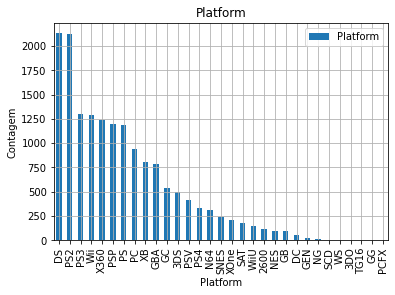

In [88]:
d = df['Platform'].value_counts()
d.plot.bar()
plt.title('Platform')
plt.xlabel("Platform")
plt.ylabel("Contagem")
plt.grid()
plt.legend()
plt.show()

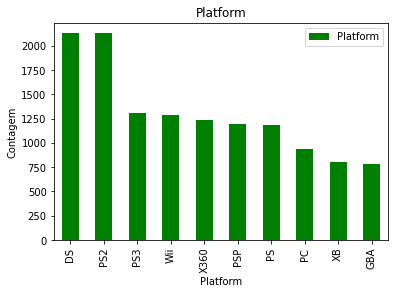

In [92]:
#Top 10 Platform
topplat = platform_c.nlargest(n=10)
topplat.plot.bar(color='green')
plt.title('Platform')
plt.xlabel("Platform")
plt.ylabel("Contagem")
plt.legend()
plt.show()

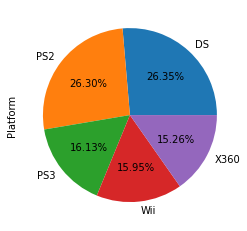

In [80]:
#Top 5 Platform
topplat2 = platform_c.nlargest(n=5)
topplat2.plot.pie(autopct="%.2f%%")
plt.show()

In [ ]:
#Top Publisher
top_Publisher = df.groupby(by=['Publisher']).sum()
top_Publisher

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
10TACLE Studios,42192,6020,0.07,0.04,0.00,0.00,0.11
1C Company,43237,6031,0.01,0.07,0.00,0.02,0.10
20th Century Fox Video Games,27266,9907,1.82,0.10,0.00,0.01,1.94
2D Boy,14013,2008,0.00,0.03,0.00,0.01,0.04
3DO,289344,72018,6.48,3.04,0.00,0.63,10.12
...,...,...,...,...,...,...,...
id Software,14602,1992,0.02,0.00,0.00,0.00,0.03
imageepoch Inc.,30688,4028,0.00,0.00,0.04,0.00,0.04
inXile Entertainment,10758,2015,0.02,0.06,0.00,0.01,0.10


<Figure size 720x720 with 0 Axes>

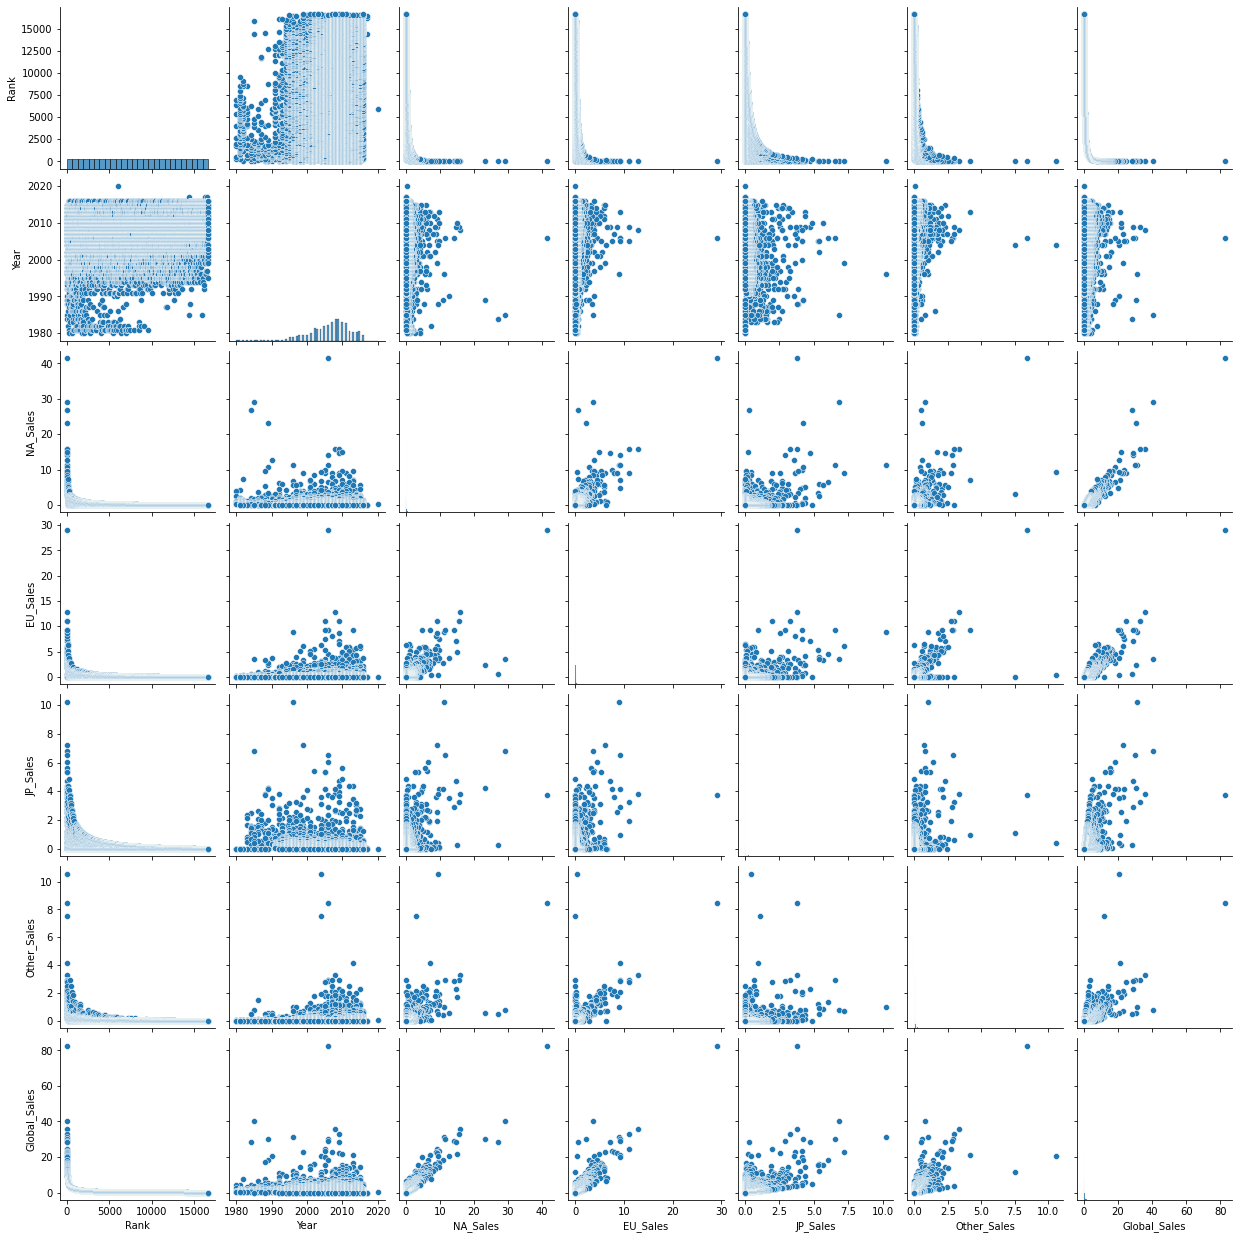

In [ ]:
#Pair Plot
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

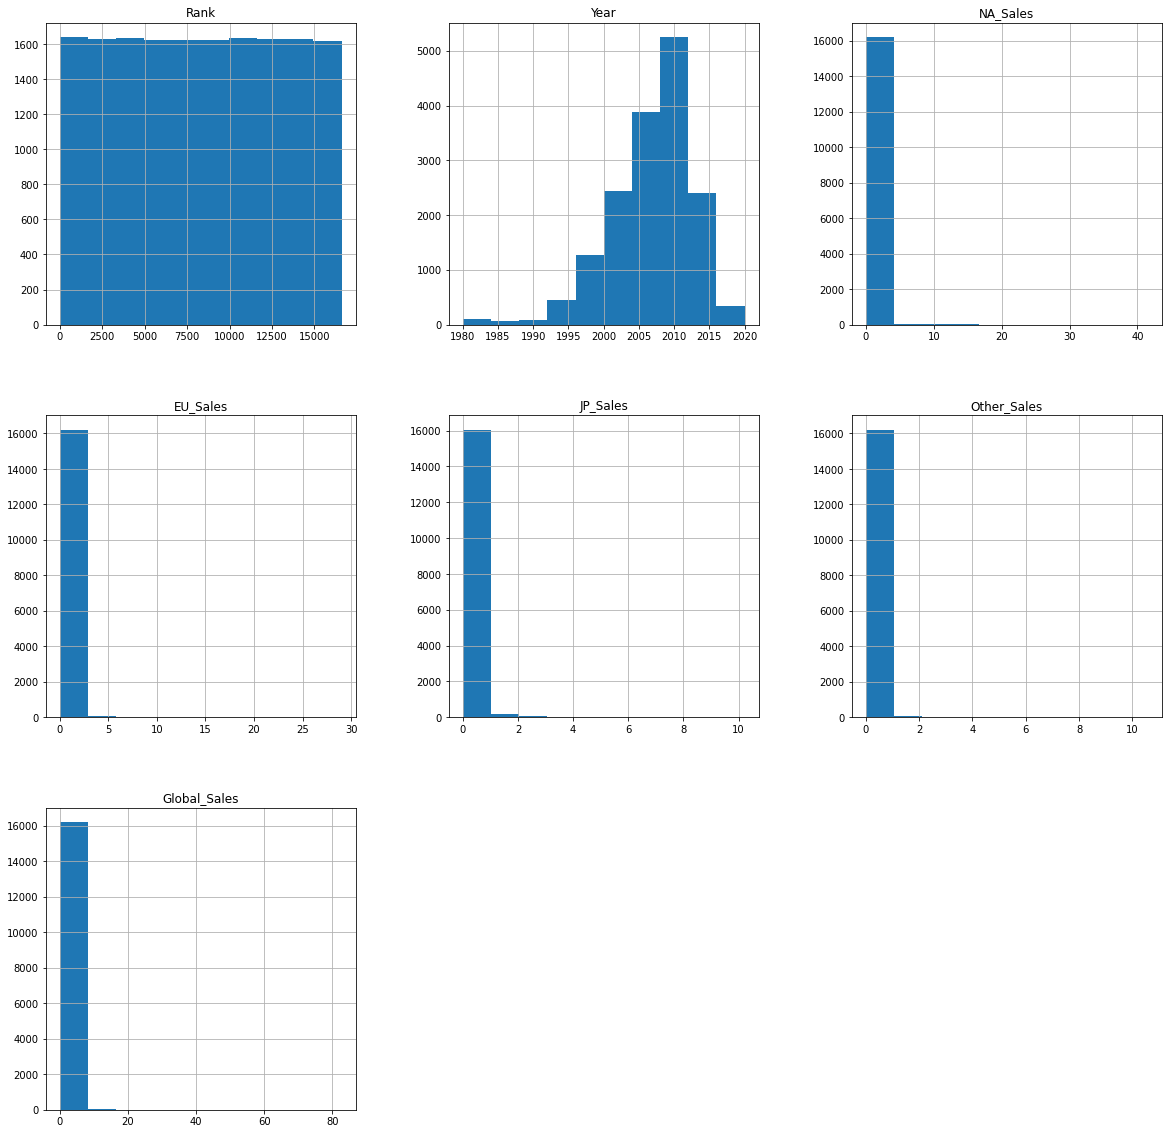

In [ ]:
#Histograma
df.hist(figsize=(20,20))
plt.show()


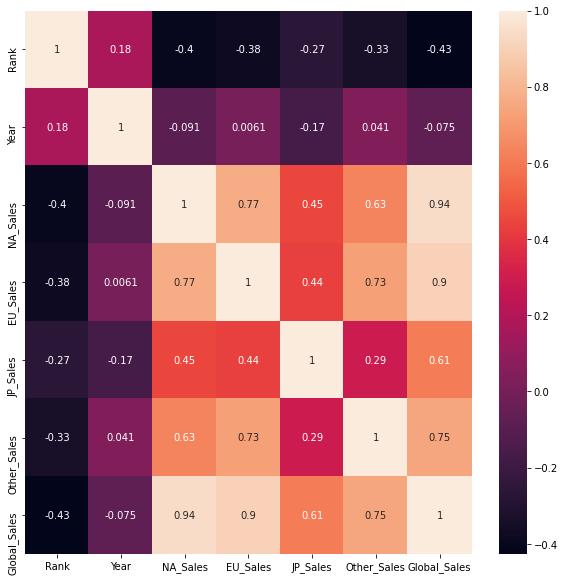

In [ ]:
# Matriz de correlação
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()


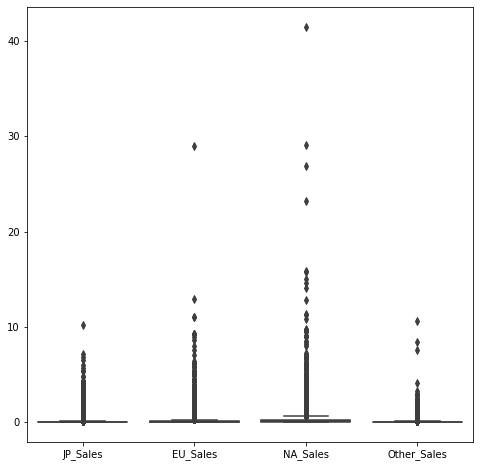

In [ ]:
#Boxplot para comparação de vendas
plt.figure(figsize=(8,8))
sns.boxplot(data = df[['JP_Sales', 'EU_Sales', 'NA_Sales', 'Other_Sales']])
plt.show()

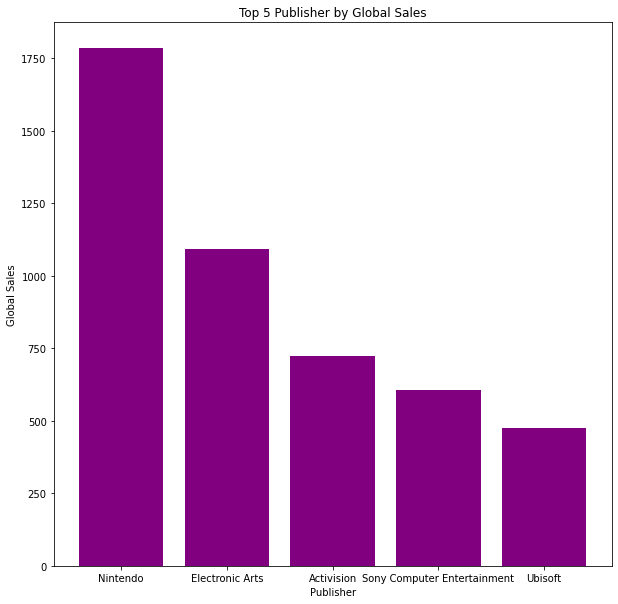

In [98]:
# Top 5 Publisher
publisher = df.groupby(by=['Publisher'])['Global_Sales'].sum()
publisher = publisher.sort_values(ascending=False).nlargest(5)

plt.figure(figsize=(10,10),)
pub_top5 = plt.bar(publisher.index, publisher, color='purple')
plt.title('Top 5 Publisher by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.show()

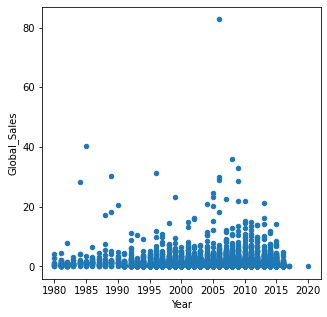

In [33]:
#Scatter plot - Year e Global_Sales
df.plot(kind='scatter', x = 'Year', y = 'Global_Sales', figsize = (5,5),)
plt.show()

In [39]:
#top 30 Publisher
top10pub = df.nlargest(30, 'Global_Sales')[['Global_Sales', 'Name', 'Publisher']]
top10pub = top10pub.groupby(pd.Grouper(key='Publisher')).size().reset_index(name='count')
top10pub

,Publisher,count
0,Nintendo,23
1,Microsoft Game Studios,1
2,Take-Two Interactive,4
3,Sony Computer Entertainment,1
4,Activision,1
